In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000810958"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000810958
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,CITIZENS & NORTHERN CORP
Ticker,CZNC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,12.0,1.434000e+01,1.660679e+00,10.7,13.76,1.486500e+01,1.543500e+01,16.31
interest income,46.0,1.354867e+07,2.654008e+06,7571000.0,11421500.00,1.272350e+07,1.542875e+07,18700000.00
net income,46.0,3.206174e+06,5.482260e+06,-28194000.0,3829000.00,4.322500e+06,5.061000e+06,6371000.00
net interest income,35.0,1.088774e+07,7.818775e+05,9949000.0,10186500.00,1.078600e+07,1.157500e+07,12394000.00
provision for loan losses,46.0,1.760870e+05,3.673977e+05,-957000.0,3250.00,1.860000e+05,3.140000e+05,1559000.00


# Plots

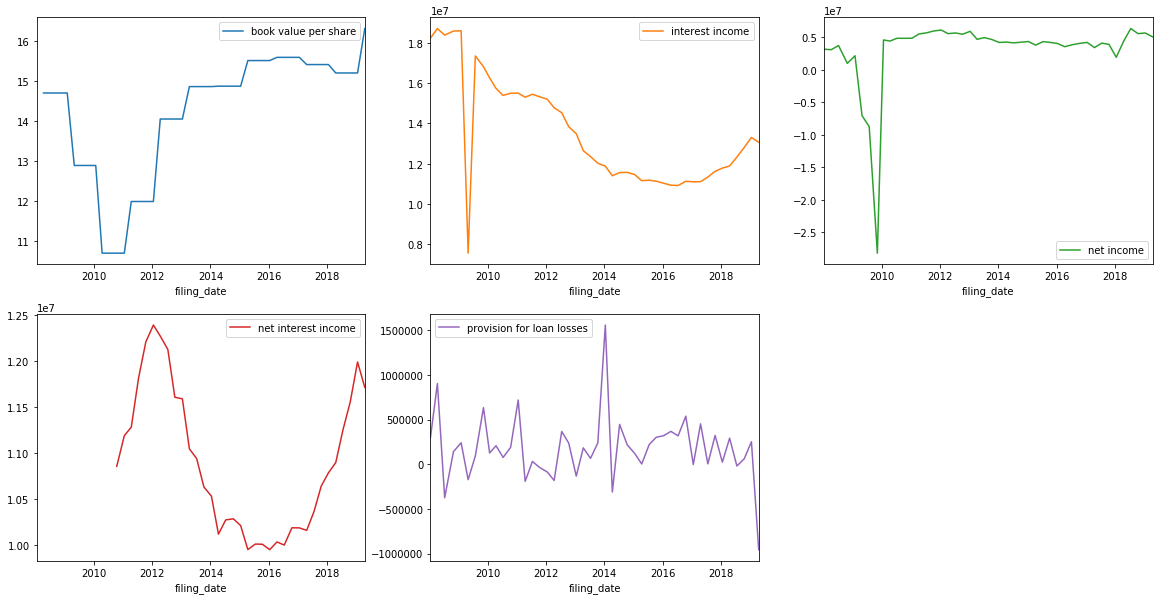

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                          
0000810958 book value per share                        2007Q4  missing   
           book value per share   2008Q2 to 2008Q4: 3 periods  missing   
           book value per share   2009Q2 to 2009Q4: 3 periods  missing   
           book value per share   2010Q2 to 2010Q4: 3 periods  missing   
           book value per share   2011Q2 to 2011Q4: 3 periods  missing   
           book value per share   2012Q2 to 2012Q4: 3 periods  missing   
           book value per share   2013Q2 to 2013Q4: 3 periods  missing   
           book value per share   2014Q2 to 2014Q4: 3 periods  missing   
           book value per share   2015Q2 to 2015Q4: 3 periods  missing   
           book value per share   2016Q2 to 2016Q4: 3 periods  missing   
           book value per share   2017Q2 to 2017Q4: 3 periods  missing   
           book value per share   2018Q2 to 2018Q4: 3 periods  missing   
           net interest income   2007Q4 to 2010Q2: 11 periods  missing   
           total revenue                                 None    empty   

                                            message  
cik        item                                      
0000810958 book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           net interest income       Missing period  
           total revenue         No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()